## Unsupervised ML Python Homework

In [3]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [4]:
data = pd.read_csv('unsupervised_ml_homework_data.csv')

### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [6]:
# Cek dimensionality dataframe awal
data.shape

(1000, 20)

In [7]:
# Memisahkan Feature dan Label
X = data.iloc[:,:19].values
Y = data.iloc[:, 19].values

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.98185353, -0.53788707, -0.83210411, ..., -0.70984907,
        -0.8144824 , -1.15191756],
       [-0.44924129, -0.39334709,  0.58897253, ...,  0.90142101,
         0.36547106, -0.5490022 ],
       [ 0.50587484, -1.64141633, -0.97688444, ..., -1.03925044,
        -0.78894395, -0.05473423],
       ...,
       [ 1.71892594, -1.58852638, -0.16315252, ..., -1.40519489,
         0.95837357, -1.18572337],
       [ 0.33299205, -0.61337247, -1.80362374, ..., -0.337537  ,
        -1.35999394,  1.46979782],
       [-1.58496936,  1.24675193, -0.0886024 , ...,  0.64126694,
        -1.11479002,  0.93547819]])

In [9]:
# Ambil sampai threshold explained variancenya 0.8 (80%): Sesuai ketentuan soal
pca_80 = PCA(0.8)

start_time = time.time()
x_new_pca_80 = pca_80.fit_transform(X_scaled)
finish_time = time.time()

In [10]:
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Feature columns yang tersisa setelah dilakukan PCA:', pca_80.n_components_)
print('Dataset yang berhasil direduksi sebesar:', (1-(pca_80.n_components_/20))*100, 'persen')

PCA Fit and Transform finished in 0.04088950157165527 seconds.
Feature columns yang tersisa setelah dilakukan PCA: 11
Dataset yang berhasil direduksi sebesar: 44.99999999999999 persen


In [11]:
# Lihat Principal Components yang dapat diambil dari explained variance 0.8 (80%)
print("Number of Components:", pca_80.n_components_)

Number of Components: 11


In [12]:
# Cek perbandingan dimensionality data sebelum dan sesudah pca
print("Sebelum direduksi:", data.shape)
print("Setelah direduksi:", x_new_pca_80.shape)

Sebelum direduksi: (1000, 20)
Setelah direduksi: (1000, 11)


##### Jawab: Hasil PCA adalah mengambil 11 Principal Components.

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

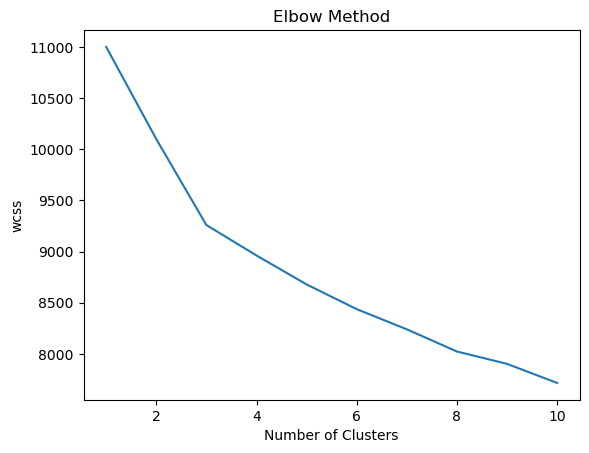

In [13]:
# Elbow Method
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(x_new_pca_80)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

# plotting the score
plt.plot(range(1,11), score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

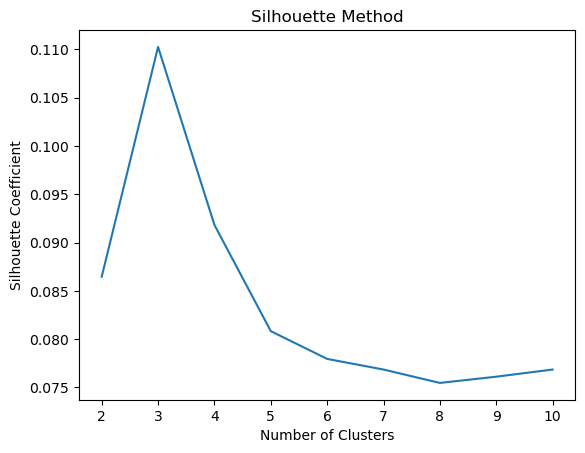

In [14]:
# Silhouette score
silhouette_coefficients = []
from sklearn.metrics import silhouette_score

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(x_new_pca_80)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title('Silhouette Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Berdasarkan visualisasi Silhoutte Method, nilai Silhouette tertinggi terjadi pada k = 3.

##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah...k =  3

Dikarenakan nilai yang paling optimal disini adalah k = 3, maka data yang ada akan terbagi menjadi 3 cluster.

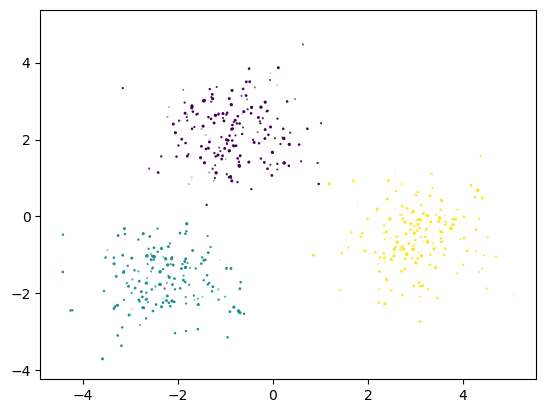

In [15]:
# Visualisasi sebagai gambaran data yang terbagi atas 3 cluster
kmeans_final = KMeans(n_clusters = 3, random_state = 5)
y_kmeans = kmeans_final.fit_predict(x_new_pca_80)

plt.scatter(x_new_pca_80[:, 0], x_new_pca_80[:, 1], x_new_pca_80[:, 2], c=y_kmeans)